NANCY DATA ALCHEMY ASSIGNMENT_WEEK3



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo 
from scipy import stats
from math import ceil
from scipy.stats import skew

sns.set(style="whitegrid")

### 1. Data Loading & Quick Overview

In [13]:
# Downloading the Dry eye disease data set
dry_eye_disease = pd.read_csv("Dry_Eye_Dataset.csv")
dry_eye_disease

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,Y,Y,3.8,N,Y,N,Y,Y
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,N,Y,Y,N,3.8,N,N,Y,N,Y
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,Y,Y,N,N,8.4,N,N,Y,N,N
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,Y,N,2.2,N,N,N,Y,Y


In [18]:
# Display first few rows
dry_eye_disease.head()

,gender,age,sleep_duration,sleep_quality,stress_level,blood_pressure,heart_rate,daily_steps,physical_activity,height,...,smoking,medical_issue,ongoing_medication,smart_device_before_bed,average_screen_time,blue-light_filter,discomfort_eye-strain,redness_in_eye,itchiness/irritation_in_eye,dry_eye_disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


# Questions to ponder: 

1. Does the data match your expectations or do you think you might need more information?
The data set matches my expectation which is to work with it for predictive models and analysis for factors affecting eye health with focus on the dry eye disease.I also intend to derive new insights on better ways to improve eye health through the intergration of machine learning and data science techniques..
2. Do the columns/features align with your problem statement?
Yes sure the columns are informative and useful for the EDA process and project course
3. Any immediate signs of missing or corrupted data? 
There are no missing values in the dataset.


### 2. Shape & Features

In [ ]:
# Checking the type of data frame
print(type(dry_eye_disease))

<class 'pandas.core.frame.DataFrame'>


In [30]:
# Shape : (rows, columns)
print(f"Dataset shape: {dry_eye_disease.shape}")

Dataset shape: (20000, 26)


In [27]:
# Display all column names
print("\nFeature Names:") 
print(dry_eye_disease.columns.tolist())


Feature Names:
['gender', 'age', 'sleep_duration', 'sleep_quality', 'stress_level', 'blood_pressure', 'heart_rate', 'daily_steps', 'physical_activity', 'height', 'weight', 'sleep_disorder', 'wake_up_during_night', 'feel_sleepy_during_day', 'caffeine_consumption', 'alcohol_consumption', 'smoking', 'medical_issue', 'ongoing_medication', 'smart_device_before_bed', 'average_screen_time', 'blue-light_filter', 'discomfort_eye-strain', 'redness_in_eye', 'itchiness/irritation_in_eye', 'dry_eye_disease']


In [28]:
# Finding duplicates in columns
dry_eye_disease.duplicated().sum()

np.int64(0)

#### Questions to ponder: 

1. Is the data large enough for the analysis?
Yes I suppose the data set is great for analysis
2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed some columns in my dataset below)
Yes the columns require renaming to snake_case.

In [23]:
# Renaming columns
dry_eye_disease.columns = dry_eye_disease.columns.str.replace(" ","_")
dry_eye_disease.columns = dry_eye_disease.columns.str.lower()
dry_eye_disease.columns

Index(['gender', 'age', 'sleep_duration', 'sleep_quality', 'stress_level',
       'blood_pressure', 'heart_rate', 'daily_steps', 'physical_activity',
       'height', 'weight', 'sleep_disorder', 'wake_up_during_night',
       'feel_sleepy_during_day', 'caffeine_consumption', 'alcohol_consumption',
       'smoking', 'medical_issue', 'ongoing_medication',
       'smart_device_before_bed', 'average_screen_time', 'blue-light_filter',
       'discomfort_eye-strain', 'redness_in_eye',
       'itchiness/irritation_in_eye', 'dry_eye_disease'],
      dtype='object')

### 3. Data Types & Missing Values

In [29]:
# understanding the datatypes
dry_eye_disease.dtypes

gender                          object
age                              int64
sleep_duration                 float64
sleep_quality                    int64
stress_level                     int64
blood_pressure                  object
heart_rate                       int64
daily_steps                      int64
physical_activity                int64
height                           int64
weight                           int64
sleep_disorder                  object
wake_up_during_night            object
feel_sleepy_during_day          object
caffeine_consumption            object
alcohol_consumption             object
smoking                         object
medical_issue                   object
ongoing_medication              object
smart_device_before_bed         object
average_screen_time            float64
blue-light_filter               object
discomfort_eye-strain           object
redness_in_eye                  object
itchiness/irritation_in_eye     object
dry_eye_disease          

In [31]:
# Checking for missing values
print("\nMissing Values Count:")
print(dry_eye_disease.isnull().sum())


Missing Values Count:
gender                         0
age                            0
sleep_duration                 0
sleep_quality                  0
stress_level                   0
blood_pressure                 0
heart_rate                     0
daily_steps                    0
physical_activity              0
height                         0
weight                         0
sleep_disorder                 0
wake_up_during_night           0
feel_sleepy_during_day         0
caffeine_consumption           0
alcohol_consumption            0
smoking                        0
medical_issue                  0
ongoing_medication             0
smart_device_before_bed        0
average_screen_time            0
blue-light_filter              0
discomfort_eye-strain          0
redness_in_eye                 0
itchiness/irritation_in_eye    0
dry_eye_disease                0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
We do not have any missing values in the data set so there is no need to impute or drop
- Could missing data be an insight in and of itself?
Yes missing data can be insightful as it can have special aspect about the data set or the column, It shows data issues and can be a guide towards data cleaning needs. As well missing data can show patterns of events.


### 4. Summary Statistics & Outlier Detection

In [32]:
#Summary statistics
dry_eye_disease.describe()

,age,sleep_duration,sleep_quality,stress_level,heart_rate,daily_steps,physical_activity,height,weight,average_screen_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [ ]:
# Checking out for any outliers using the 
dry_eye_disease = dry_eye_disease.dropna()
numeric_columns = dry_eye_disease.select_dtypes(include=['number'])

if not numeric_columns.empty:
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))

    outliers_data = dry_eye_disease[outliers.any(axis=1)]

    print(outliers_data)
else:
    print("No numeric columns found in the dataset.")


Empty DataFrame
Columns: [gender, age, sleep_duration, sleep_quality, stress_level, blood_pressure, heart_rate, daily_steps, physical_activity, height, weight, sleep_disorder, wake_up_during_night, feel_sleepy_during_day, caffeine_consumption, alcohol_consumption, smoking, medical_issue, ongoing_medication, smart_device_before_bed, average_screen_time, blue-light_filter, discomfort_eye-strain, redness_in_eye, itchiness/irritation_in_eye, dry_eye_disease]
Index: []

[0 rows x 26 columns]


#### Question to ponder
- Did you expect outliers? 
Not really I did not expect any since the data looked seemingly welll prepared and cleaned
- Which features have unusually high or low values? What do they tell us about the data?
- Are there any suspicious patterns or extreme outliers?
No I havent encountered any outrageous values, Though will need some more support for data cleaning and analysis.
- Do we need to drop or transform these outliers?
N/A

### 5. Univariate Analysis

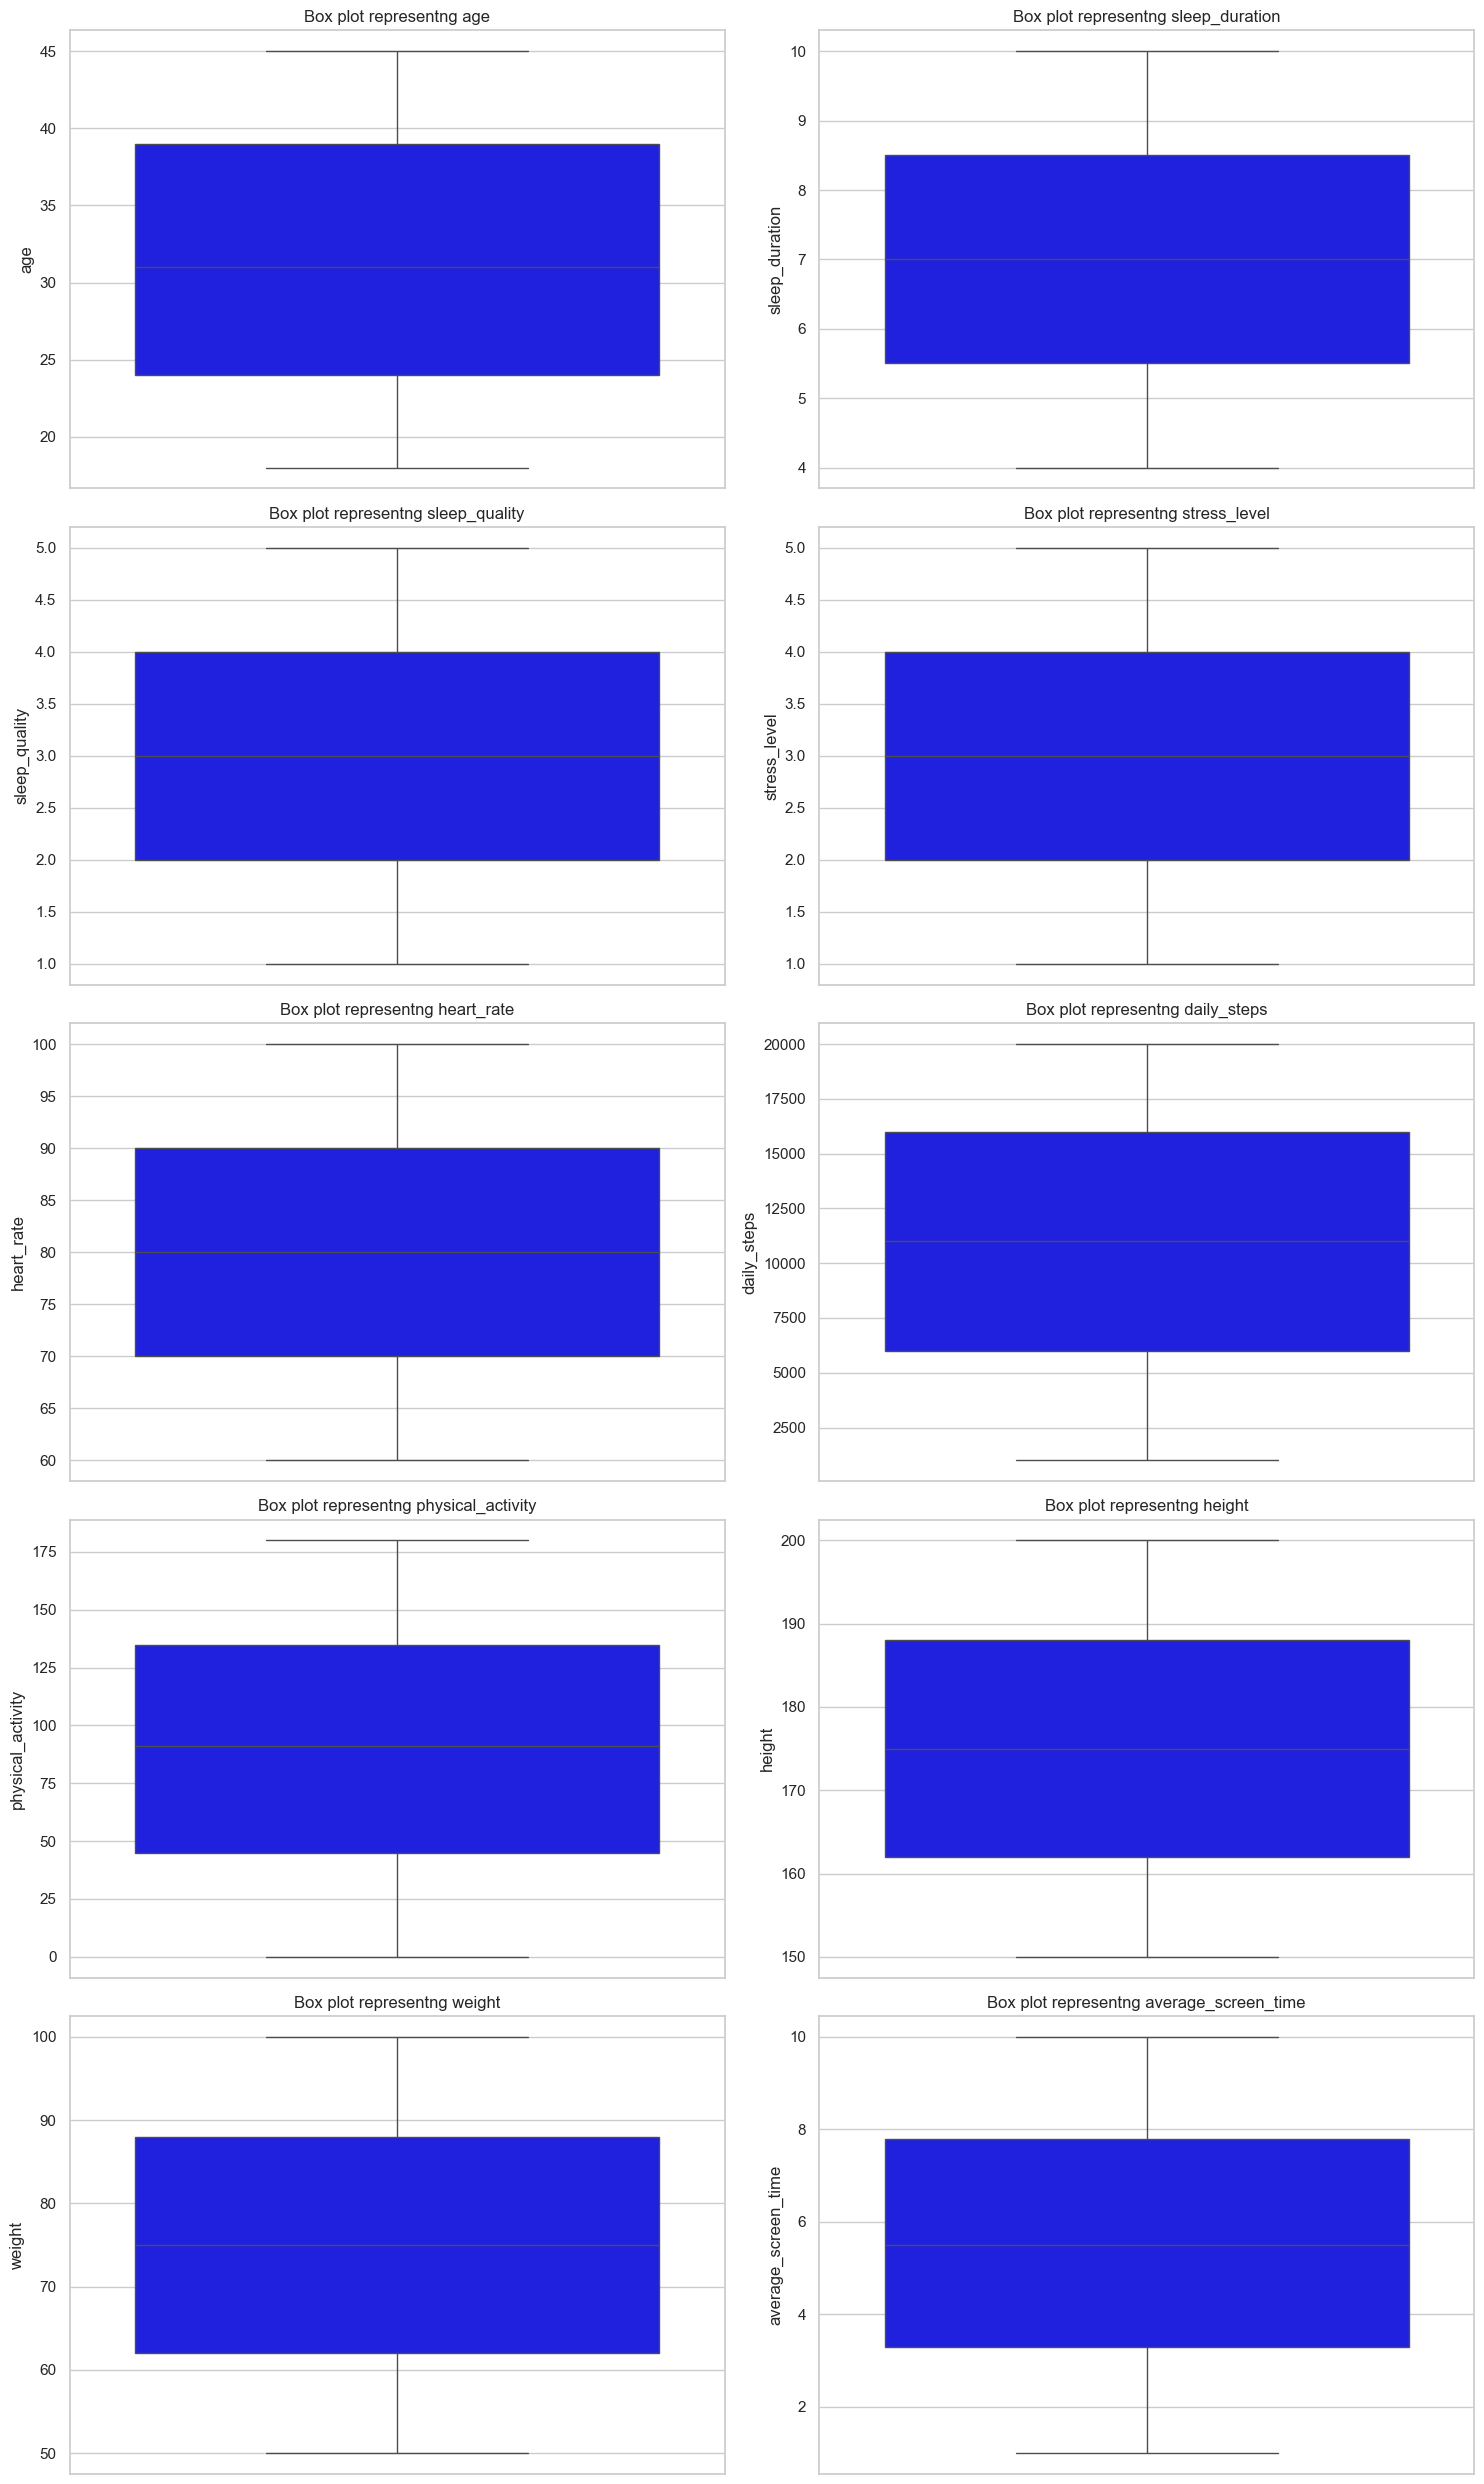

In [74]:
# Creating box plots for visualization of outliers in the numeric columns in the data set
numeric_columns = dry_eye_disease.select_dtypes(include=['number'])
n_columns_grid = 2
n_rows = (len(numeric_columns.columns) // n_columns_grid) + (len(numeric_columns.columns) % n_columns_grid > 0)
fig, axes = plt.subplots(n_rows, n_columns_grid, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(numeric_columns.columns):
    sns.boxplot(data=dry_eye_disease[column], ax=axes[i], color='blue')
    axes[i].set_title(f"Box plot representng {column}")

plt.tight_layout()
plt.show()




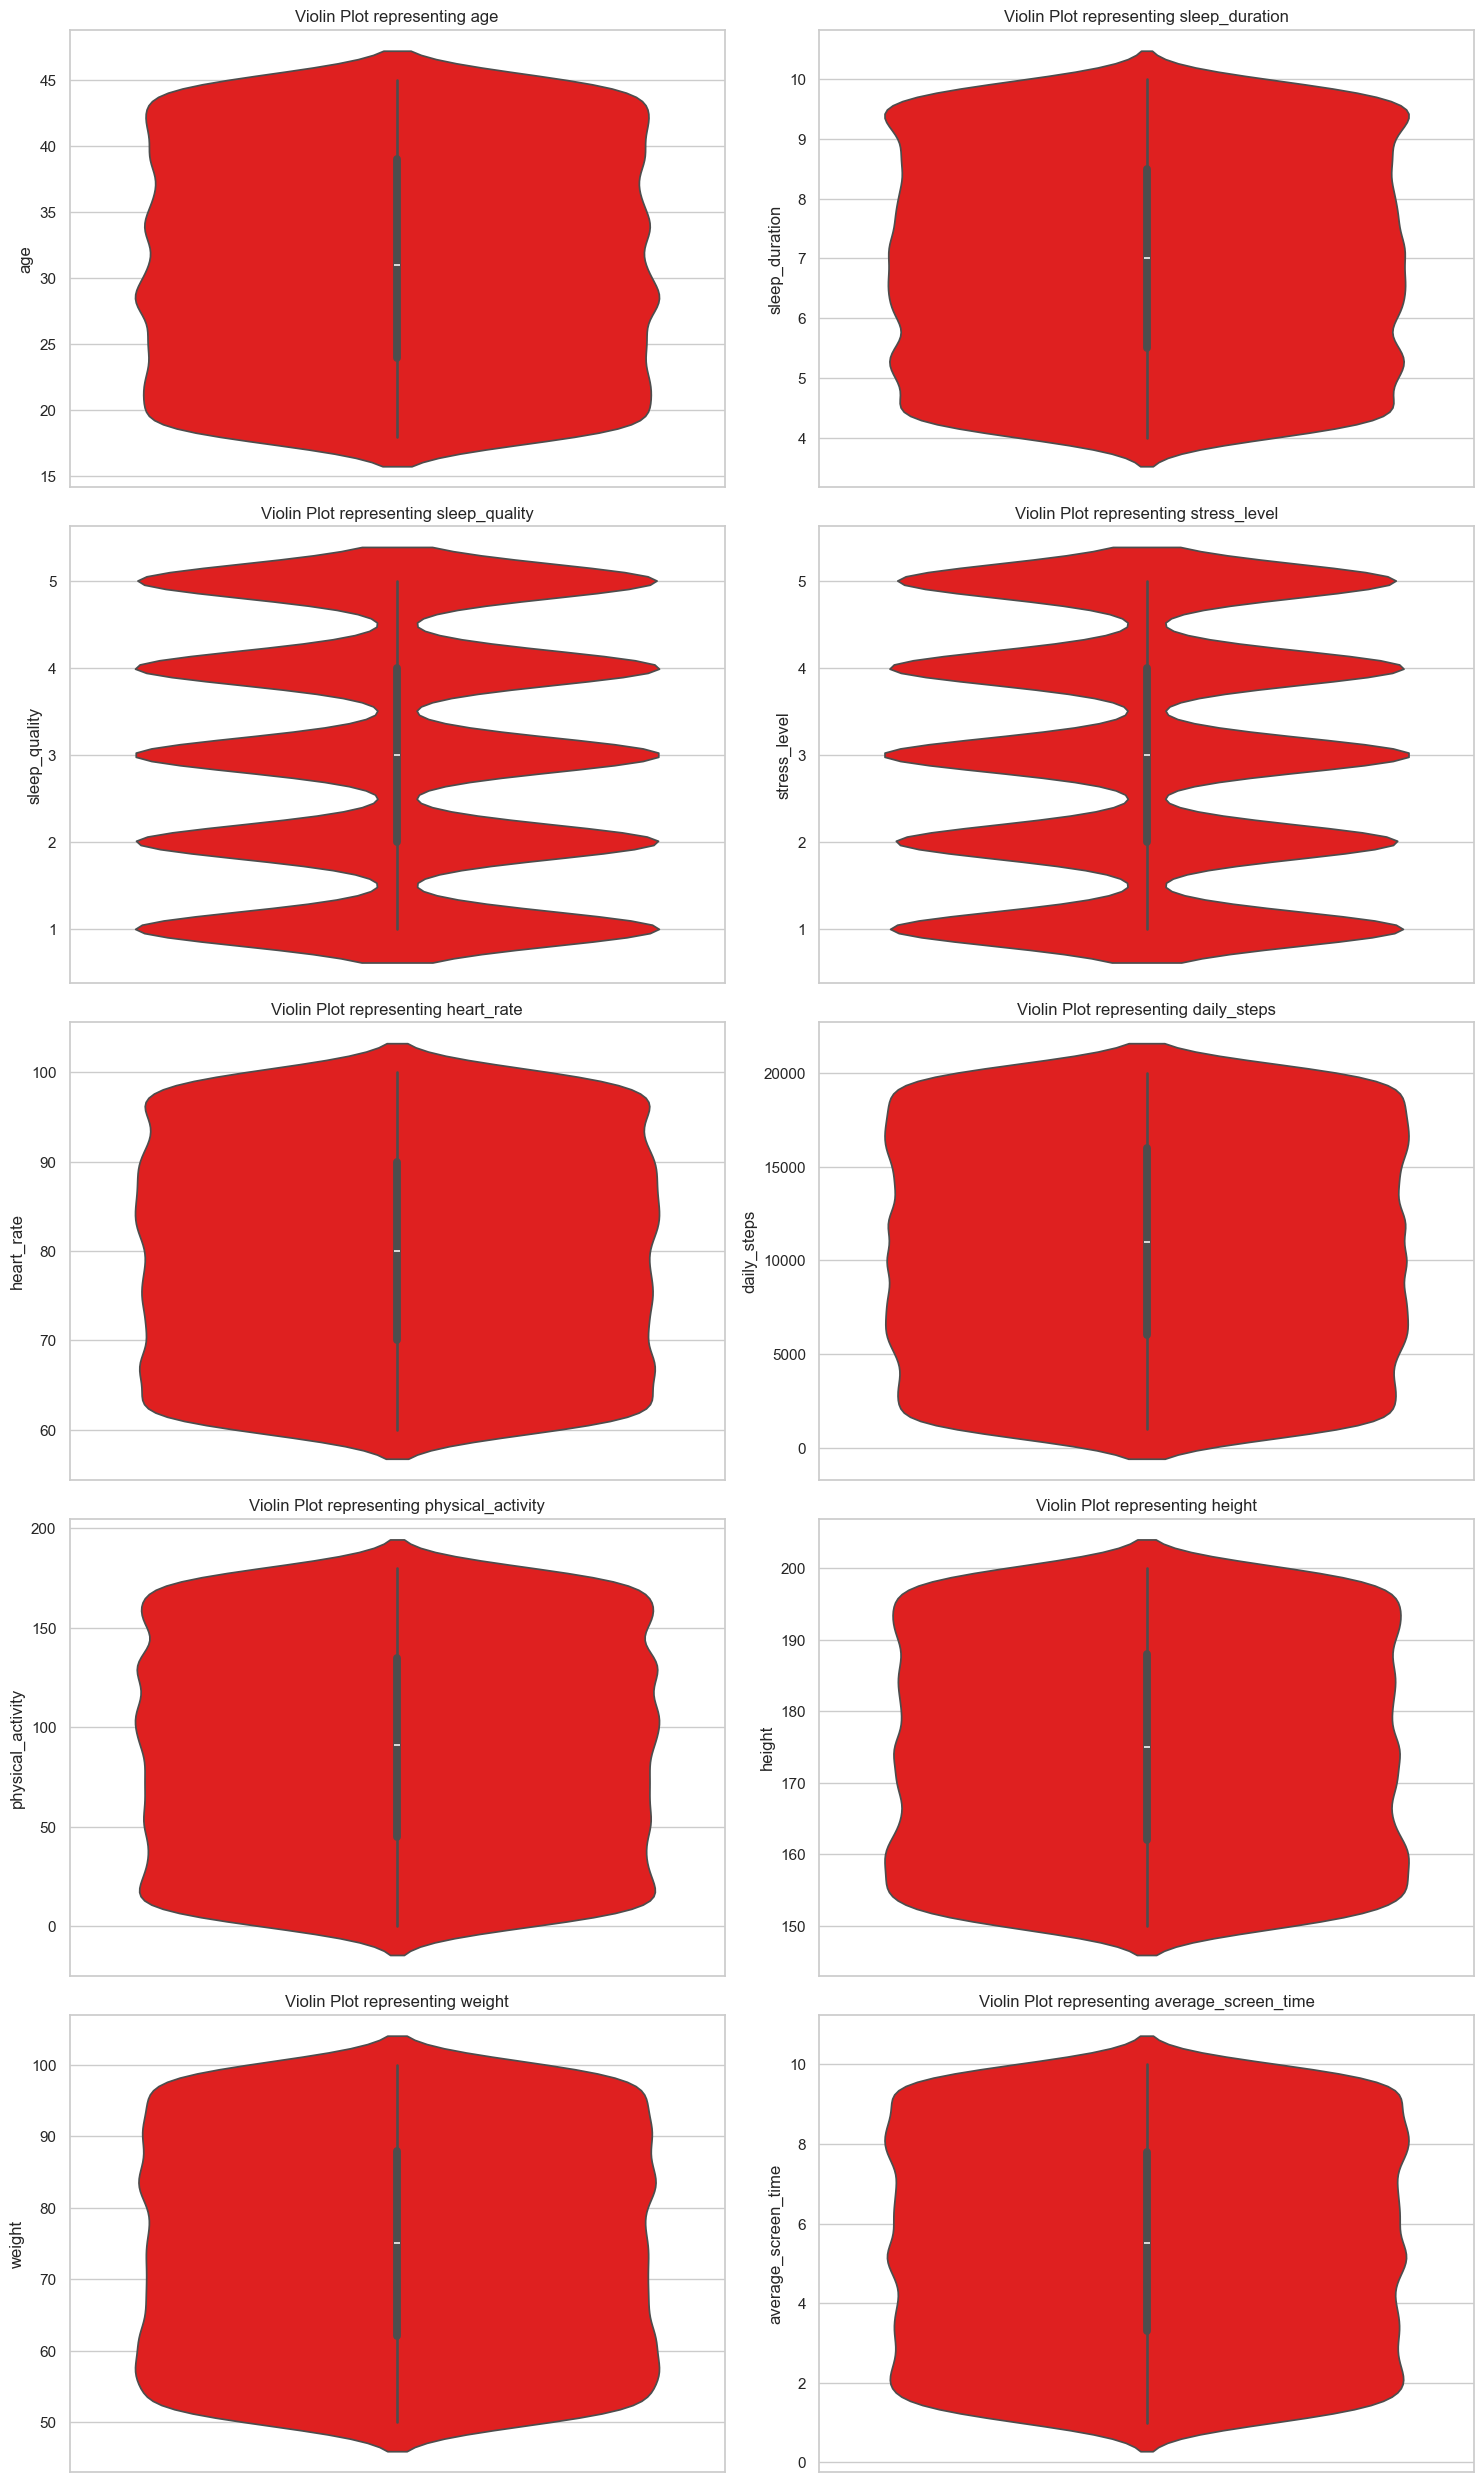

In [73]:
# Create violin plots for numerical variables
numeric_columns = dry_eye_disease.select_dtypes(include=['number'])
n_columns_grid = 2  
n_rows = (len(numeric_columns.columns) // n_columns_grid) + (len(numeric_columns.columns) % n_columns_grid > 0)

fig, axes = plt.subplots(n_rows, n_columns_grid, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    sns.violinplot(data=dry_eye_disease[column], ax=axes[i], color="red")
    axes[i].set_title(f"Violin Plot representing {column}")

for i in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

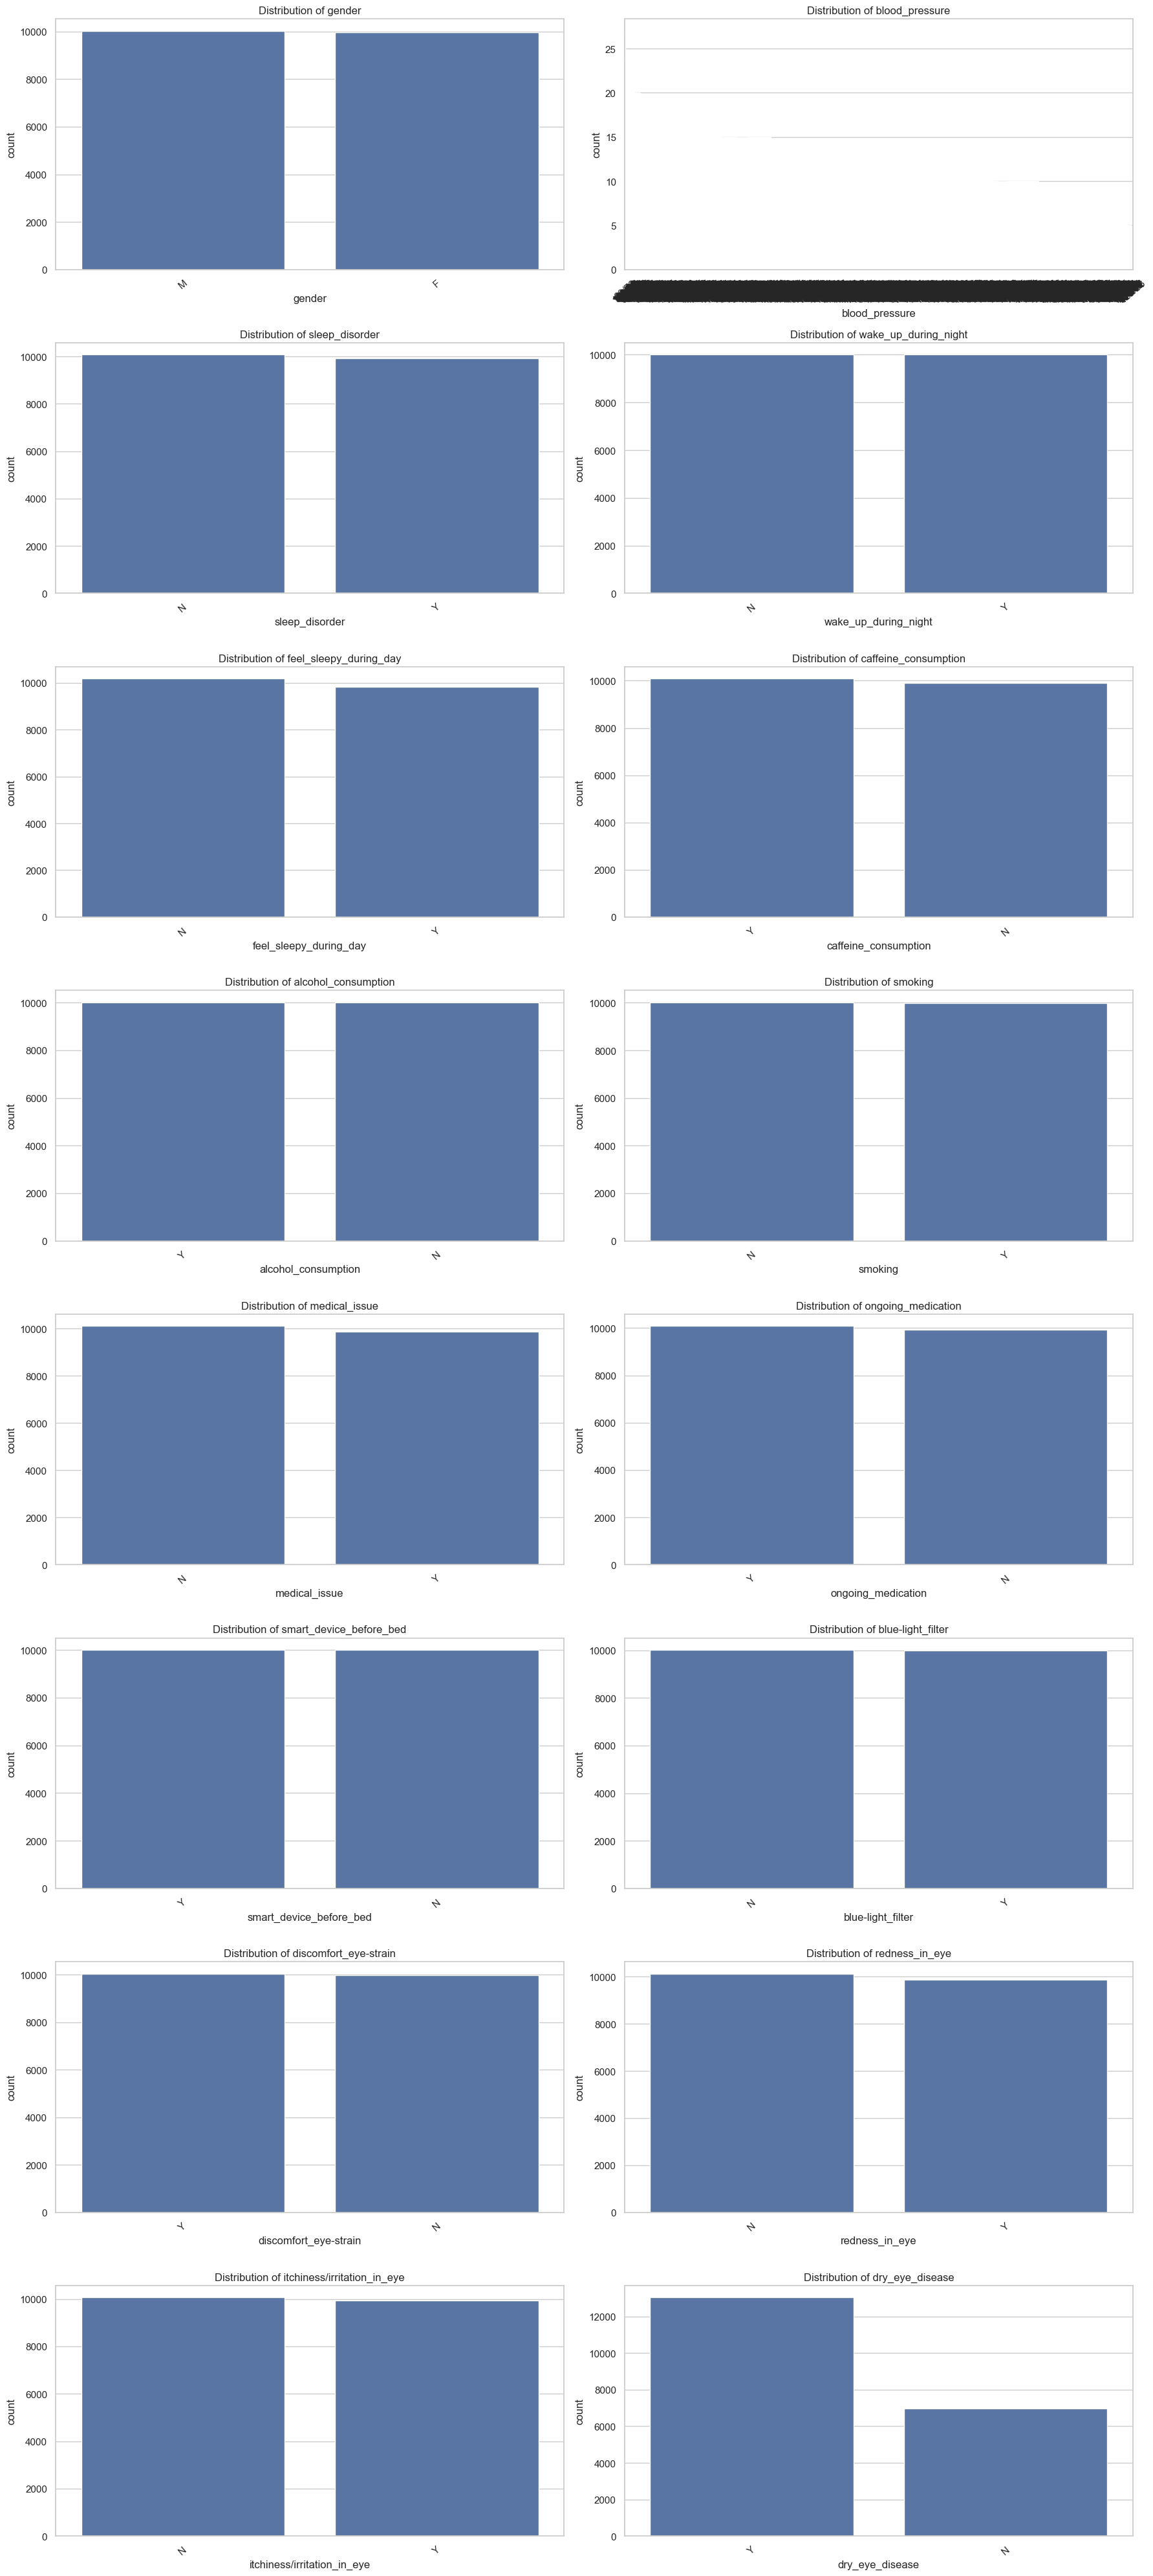

In [78]:
categorical_var = dry_eye_disease.select_dtypes(include=['object', 'category']).columns
n_cols = 2
n_rows = ceil(len(categorical_var) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
ax = ax.flatten()
for i, feature in enumerate(categorical_var):
    sns.countplot(data=dry_eye_disease, x=feature, order=dry_eye_disease[feature].value_counts().index, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].tick_params(axis='x', rotation=40)

for i in range(len(categorical_var), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

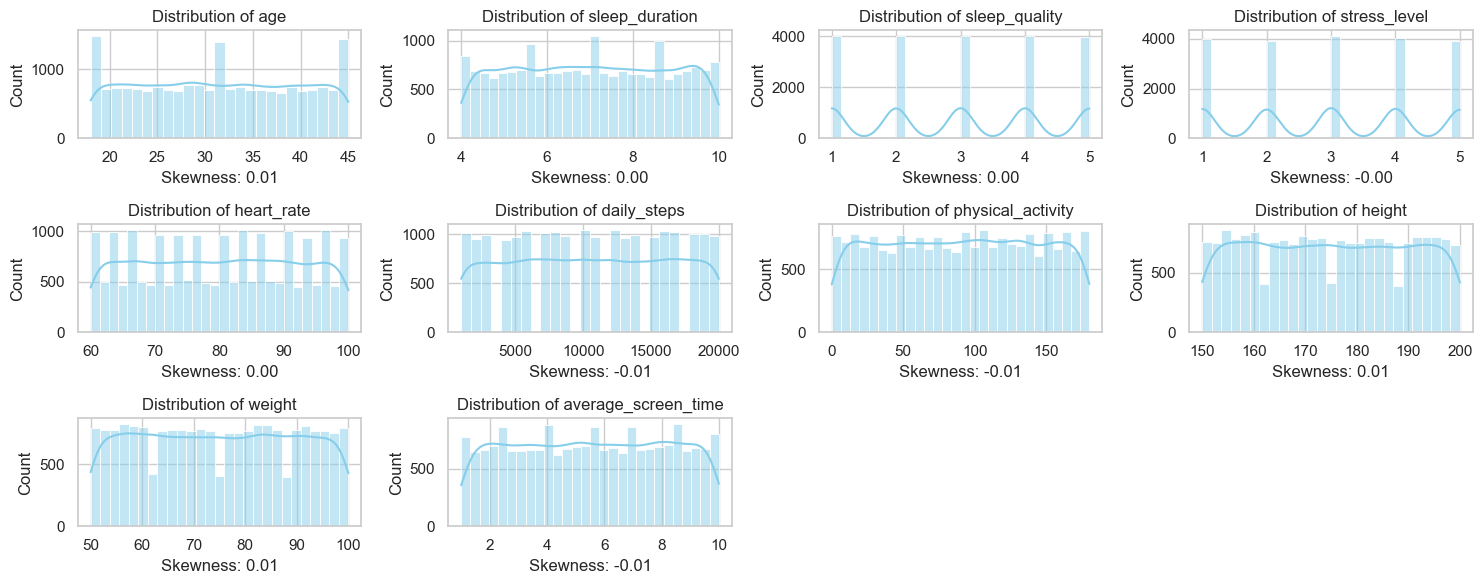

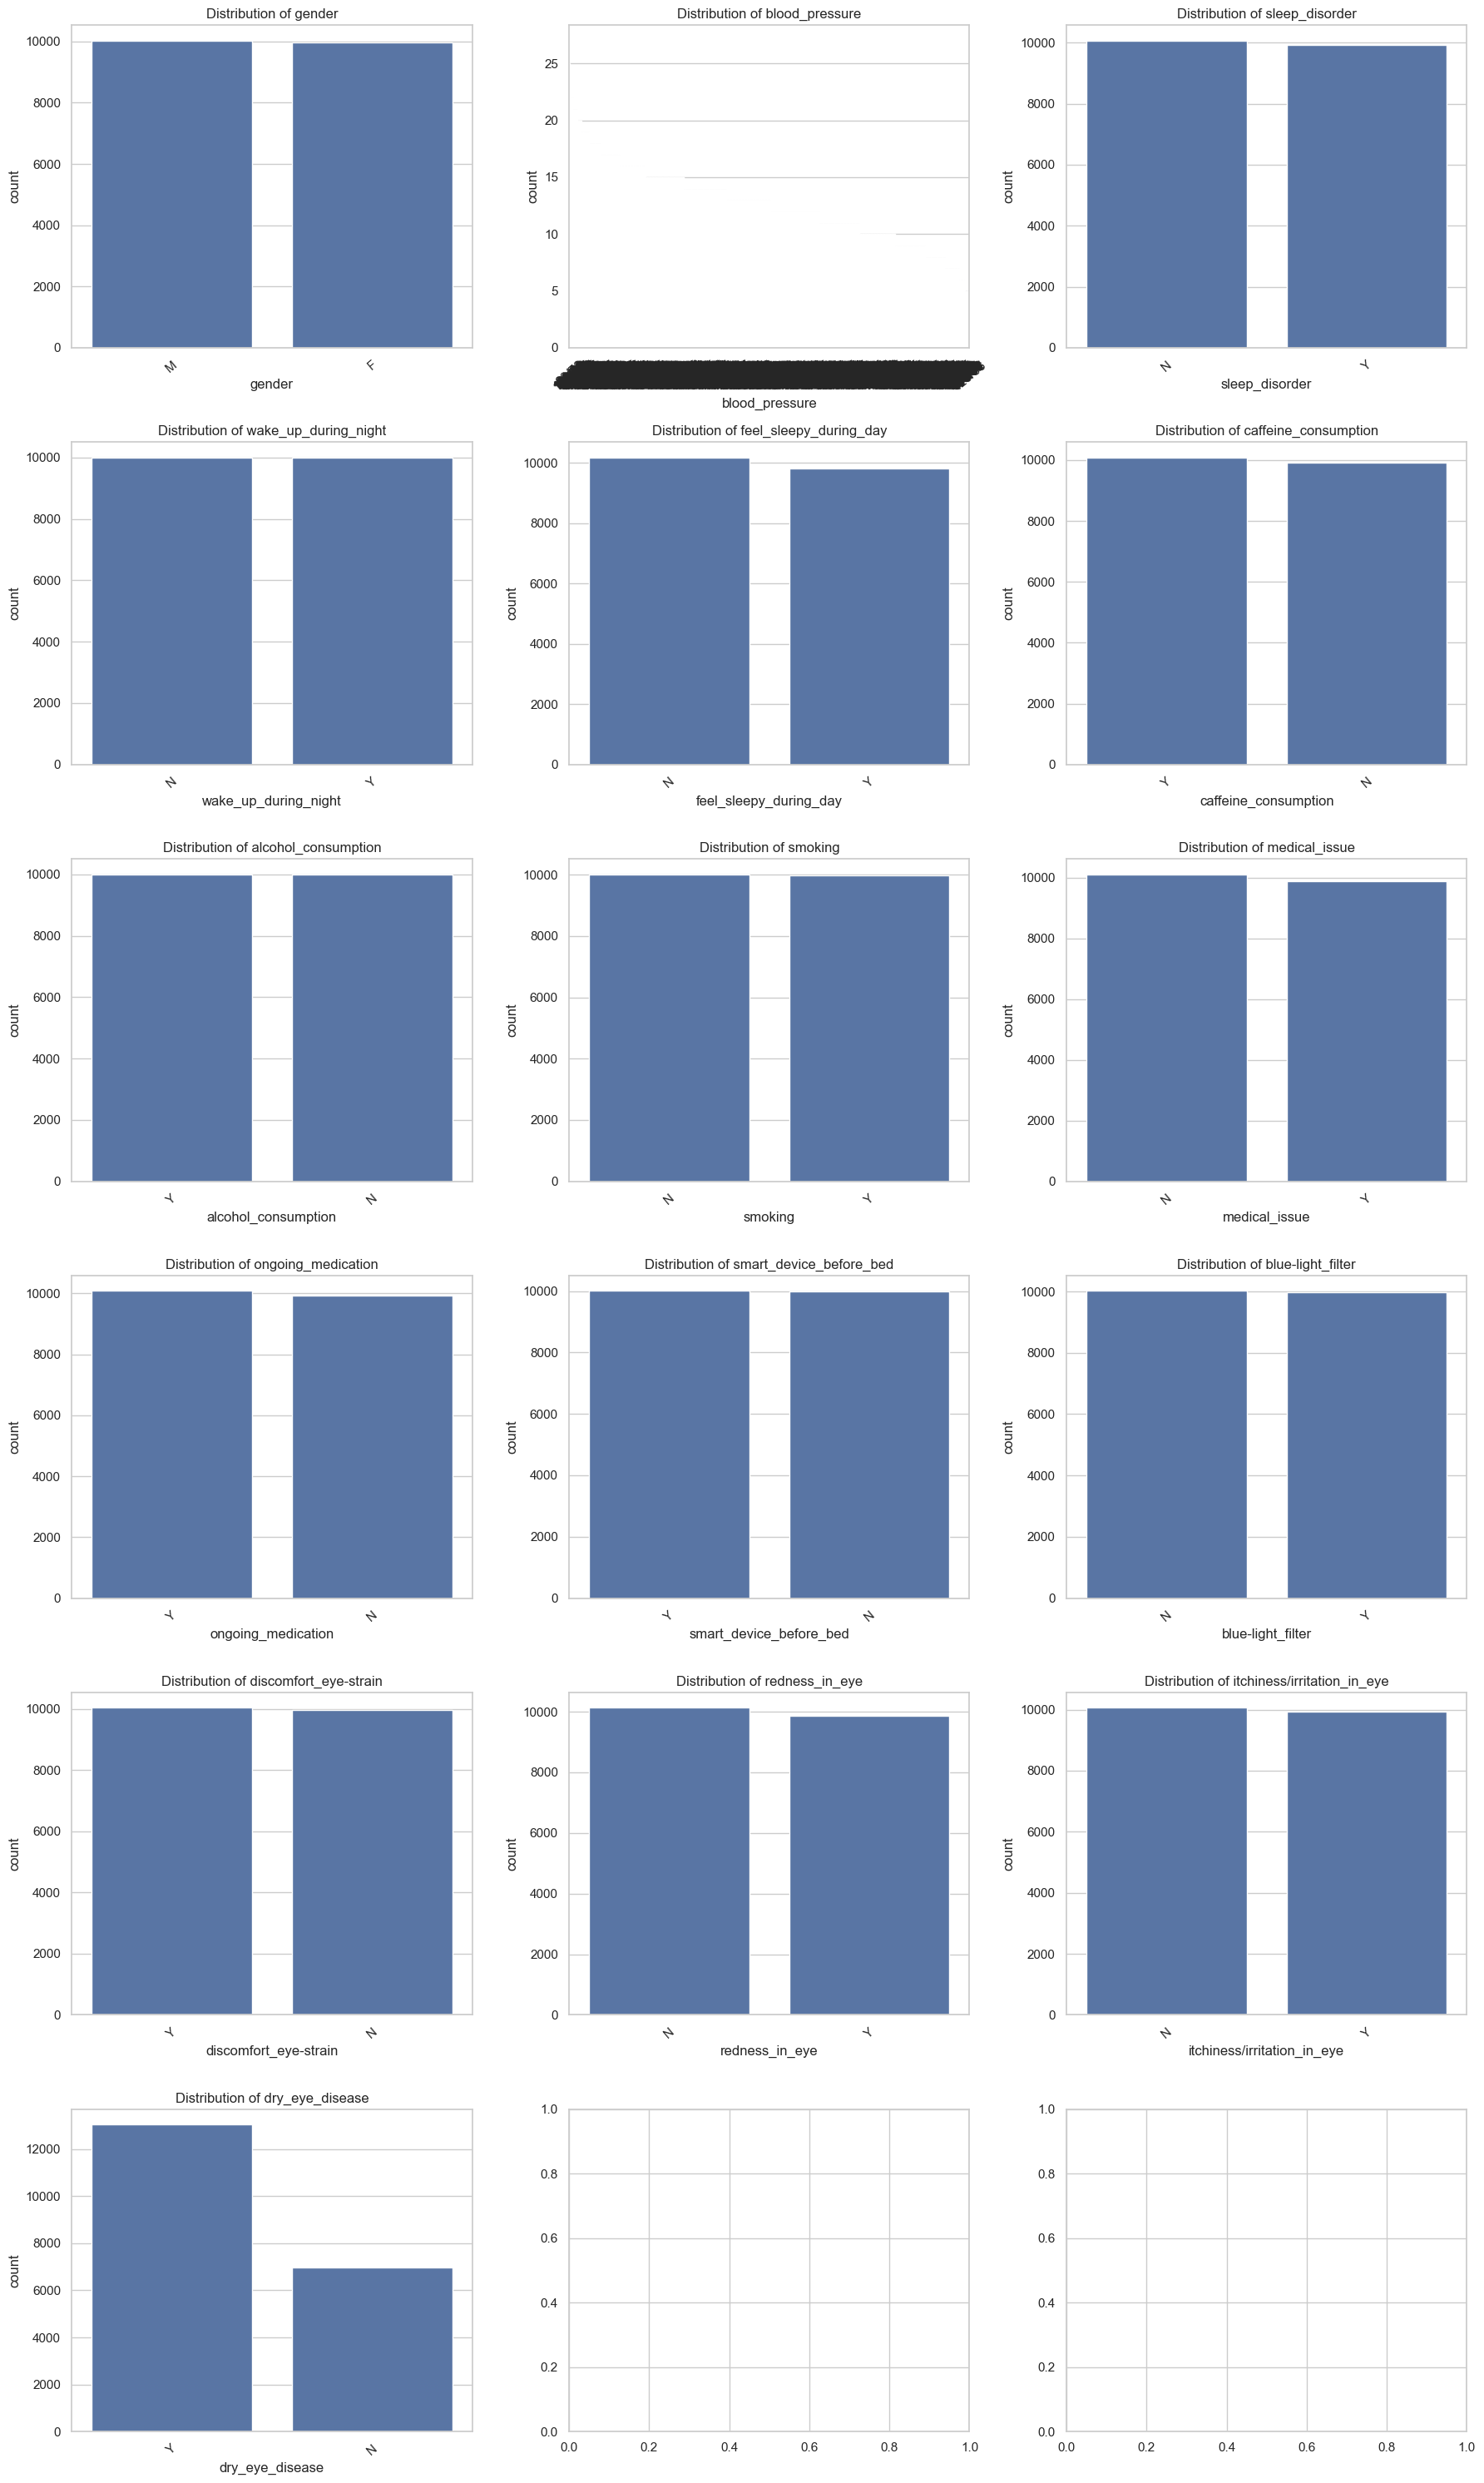

In [86]:
# Checking for skwenness and checking for categorical variable dominance

numeric_columns = dry_eye_disease.select_dtypes(include=['number'])

plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(dry_eye_disease[column], kde=True, color="skyblue")
    skewness = skew(dry_eye_disease[column].dropna())
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"Skewness: {skewness:.2f}")
plt.tight_layout()
plt.show()

# Showing distributions
cat_features = dry_eye_disease.select_dtypes(include=['object', 'category']).columns

fig, ax = plt.subplots(len(cat_features) // 3 + 1, 3, figsize=(18, 5 * (len(cat_features) // 3 + 1)))
ax = ax.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(data=dry_eye_disease, x=feature, order=dry_eye_disease[feature].value_counts().index, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].tick_params(axis='x', rotation=40)

plt.tight_layout()
plt.show()

#### Questions to ponder:
Out of topic, One thing I noticed was that blood pressure might have been assigned a data type wrongly it should be a numeric variable.
- Are the numerical features skewed or roughly normal?
Some values are skewed a little bit towards the right , others just a little bit towards the left while some have normal distribution.
- Which categories dominate in each categorical feature? What does that tell you about each feature? 
The distribution for blood pressure, redness in eyes and itchiness in eye were not visible which made me think that they might have been wrngly identified or had some issues in the data set.

### 6. Bivariate Analysis

In [ ]:
# Scatter plot for numerical vs. numerical
sns.scatterplot(data=df, x='age', y='income')
plt.title("age vs. income")
plt.show()

# Grouped bar plot for categorical vs. categorical
sns.countplot(data=df, x='education', hue='marital_status')
plt.title("Categorical Relationship")
plt.xticks(rotation=45)
plt.show()

# Box plot for numerical vs. categorical
sns.boxplot(data=df, x='education', y='age')
plt.title("Boxplot: age by education")
plt.xticks(rotation=45)
plt.show()

#### Questions to ponder

- Which numerical features are correlated?
- Do certain categories strongly associate with higher or lower numerical values?
- Any visible clusters or patterns in scatter plots?

### 7. Multivariate Analysis

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Questions to ponder

- Which features show strong correlation?
- Should we remove or combine highly correlated features?
- Are there surprising correlations that warrant deeper investigation?

### 8. Next Steps

- Which features appear most important for the problem?
- What data cleaning or transformation steps remain?
- How will these insights guide the next phase (modeling, reporting, or business decisions)?